Exploratory-

traffic I-94 analyst associate with determine indicators of heavy traffic on I-94.
results of our analysis will be about the westbound traffic in the proximity of that station.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline   #this enables Jupyter to generate the graphs

traffic=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.info()
traffic.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


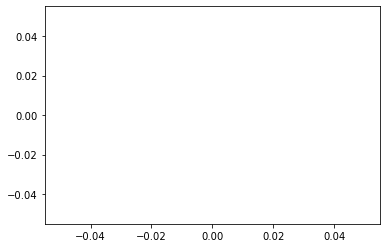

In [6]:
plt.plot()    ## to make sure plot can be working.
plt.show()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

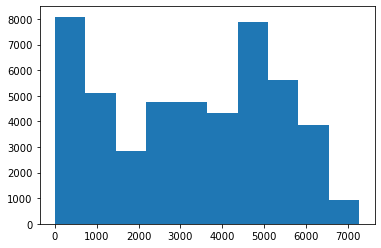

In [9]:
plt.hist(traffic['traffic_volume'])
traffic['traffic_volume'].describe()

In [26]:
traffic['date_time']=pd.to_datetime(traffic['date_time'])  #convert date_time from object to datetime
traffic['date_time'].dt.hour.between(7,19)    #filter 白天的时间
daytime=traffic['date_time'].dt.hour.between(7,19)
nighttime=~daytime
traffic_daytime=traffic[daytime]
traffic_nighttime=traffic[nighttime]
#print(traffic_daytime)
#print(traffic_nighttime)

plot-hisograms:
conclusion 0:
#according to graphs of daytime and nighttime, the main casues will be happened during daytime

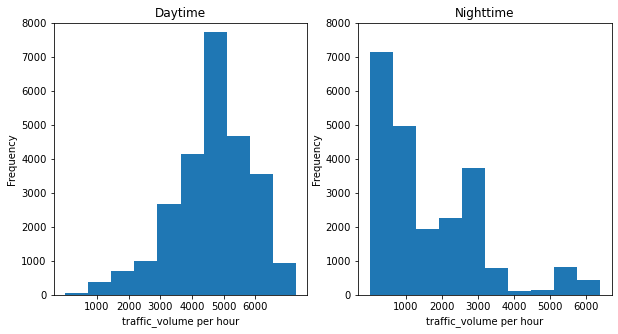

In [46]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
traffic_daytime['traffic_volume'].plot.hist()
plt.xlabel('traffic_volume per hour')
plt.ylabel('Frequency')
plt.title('Daytime')
plt.xticks(ticks=[1000,2000,3000,4000,5000,6000])
plt.ylim(0, 8000)
plt.subplot(1,2,2)
plt.xlabel('traffic_volume per hour')
plt.ylabel('Frequency')
traffic_nighttime['traffic_volume'].plot.hist()
plt.title('Nighttime')
plt.xticks(ticks=[1000,2000,3000,4000,5000,6000])
plt.ylim(0, 8000)

plt.show()

In [48]:
traffic_daytime['traffic_volume'].describe()


count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [49]:
traffic_nighttime['traffic_volume'].describe()

count    22366.000000
mean      1654.648484
std       1425.175292
min          0.000000
25%        486.000000
50%       1056.500000
75%       2630.750000
max       6386.000000
Name: traffic_volume, dtype: float64

#traffic volume in month 
conclusion 1:

The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).

<ipython-input-57-3ef3f08a5250>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_daytime['month']=traffic_daytime['date_time'].dt.month


<AxesSubplot:xlabel='month'>

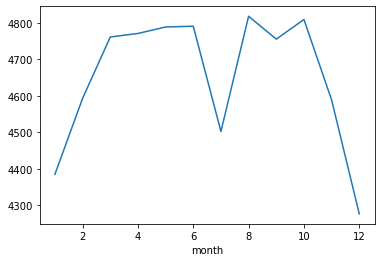

In [57]:
traffic_daytime['month']=traffic_daytime['date_time'].dt.month
traffic_daytime_month=traffic_daytime.groupby('month').mean()
traffic_daytime_month['traffic_volume'].plot.line()

#traffic volume in day of week
conclusion 2:
The traffic is usually heavier on business days compared to weekends.

<ipython-input-66-6151456ade9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_daytime['dayofweek']=traffic_daytime['date_time'].dt.dayofweek


<AxesSubplot:xlabel='dayofweek'>

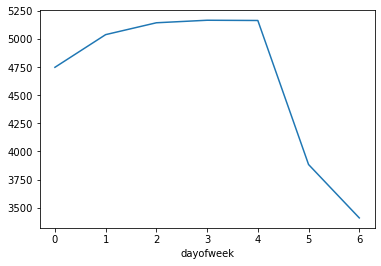

In [66]:
traffic_daytime['dayofweek']=traffic_daytime['date_time'].dt.dayofweek
traffic_daytime_dayofweek=traffic_daytime.groupby('dayofweek').mean()
traffic_daytime_dayofweek['traffic_volume'].plot.line()

#time of a day in weekday and weekend

data in business day and weekend 
conclusion 3:
On business days, the rush hours are around 7 and 16.

<ipython-input-70-037572c75680>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_daytime['hour']=traffic_daytime['date_time'].dt.hour


Text(0.5, 1.0, 'Weekend_hour')

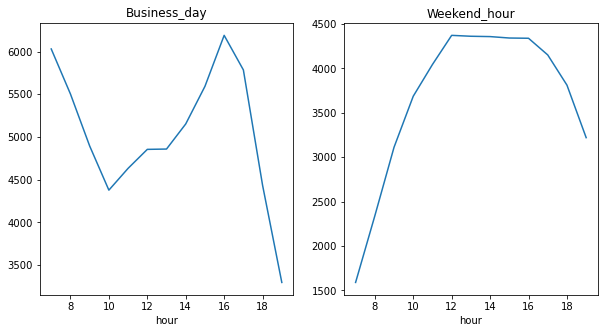

In [70]:
traffic_daytime['hour']=traffic_daytime['date_time'].dt.hour
traffic_daytime_weekday=traffic_daytime[traffic_daytime['dayofweek']<=4]
traffic_daytime_weekend=traffic_daytime[traffic_daytime['dayofweek']>=5]
traffic_daytime_weekday_hour=traffic_daytime_weekday.groupby('hour').mean()
traffic_daytime_weekend_hour=traffic_daytime_weekend.groupby('hour').mean()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
traffic_daytime_weekday_hour['traffic_volume'].plot.line()
plt.title('Business_day')
plt.subplot(1,2,2)
traffic_daytime_weekend_hour['traffic_volume'].plot.line()
plt.title('Weekend_hour')


the influence of weather in the traffic 


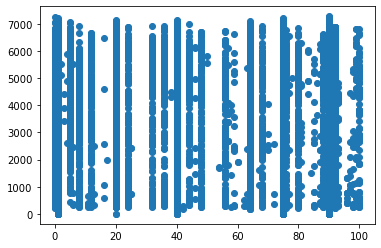

In [77]:
nweather_col = traffic.columns[2:5]
traffic[nweather_col].corrwith(traffic['traffic_volume'])   # it shows clouds is the most related reason
plt.scatter(traffic['clouds_all'],traffic['traffic_volume'])

In [78]:
traffic['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

#according to graphs of daytime and nighttime, the main casues will be happened during daytime
conclusion 4:
Shower snow
Light rain and snow
Proximity thunderstorm with drizzle
which would casue traffic since those three exceed 5000

weather_main=traffic_daytime.groupby('weather_main').mean()
weather_description=traffic_daytime.groupby('weather_description').mean()

In [79]:
weather_main=traffic_daytime.groupby('weather_main').mean() 
weather_description=traffic_daytime.groupby('weather_description').mean()

<AxesSubplot:ylabel='weather_main'>

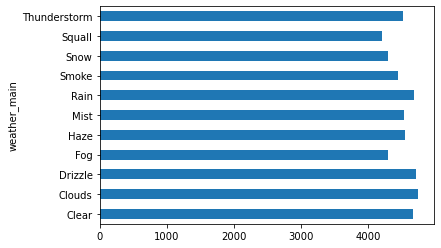

In [82]:
weather_main['traffic_volume'].plot.barh()

<AxesSubplot:ylabel='weather_description'>

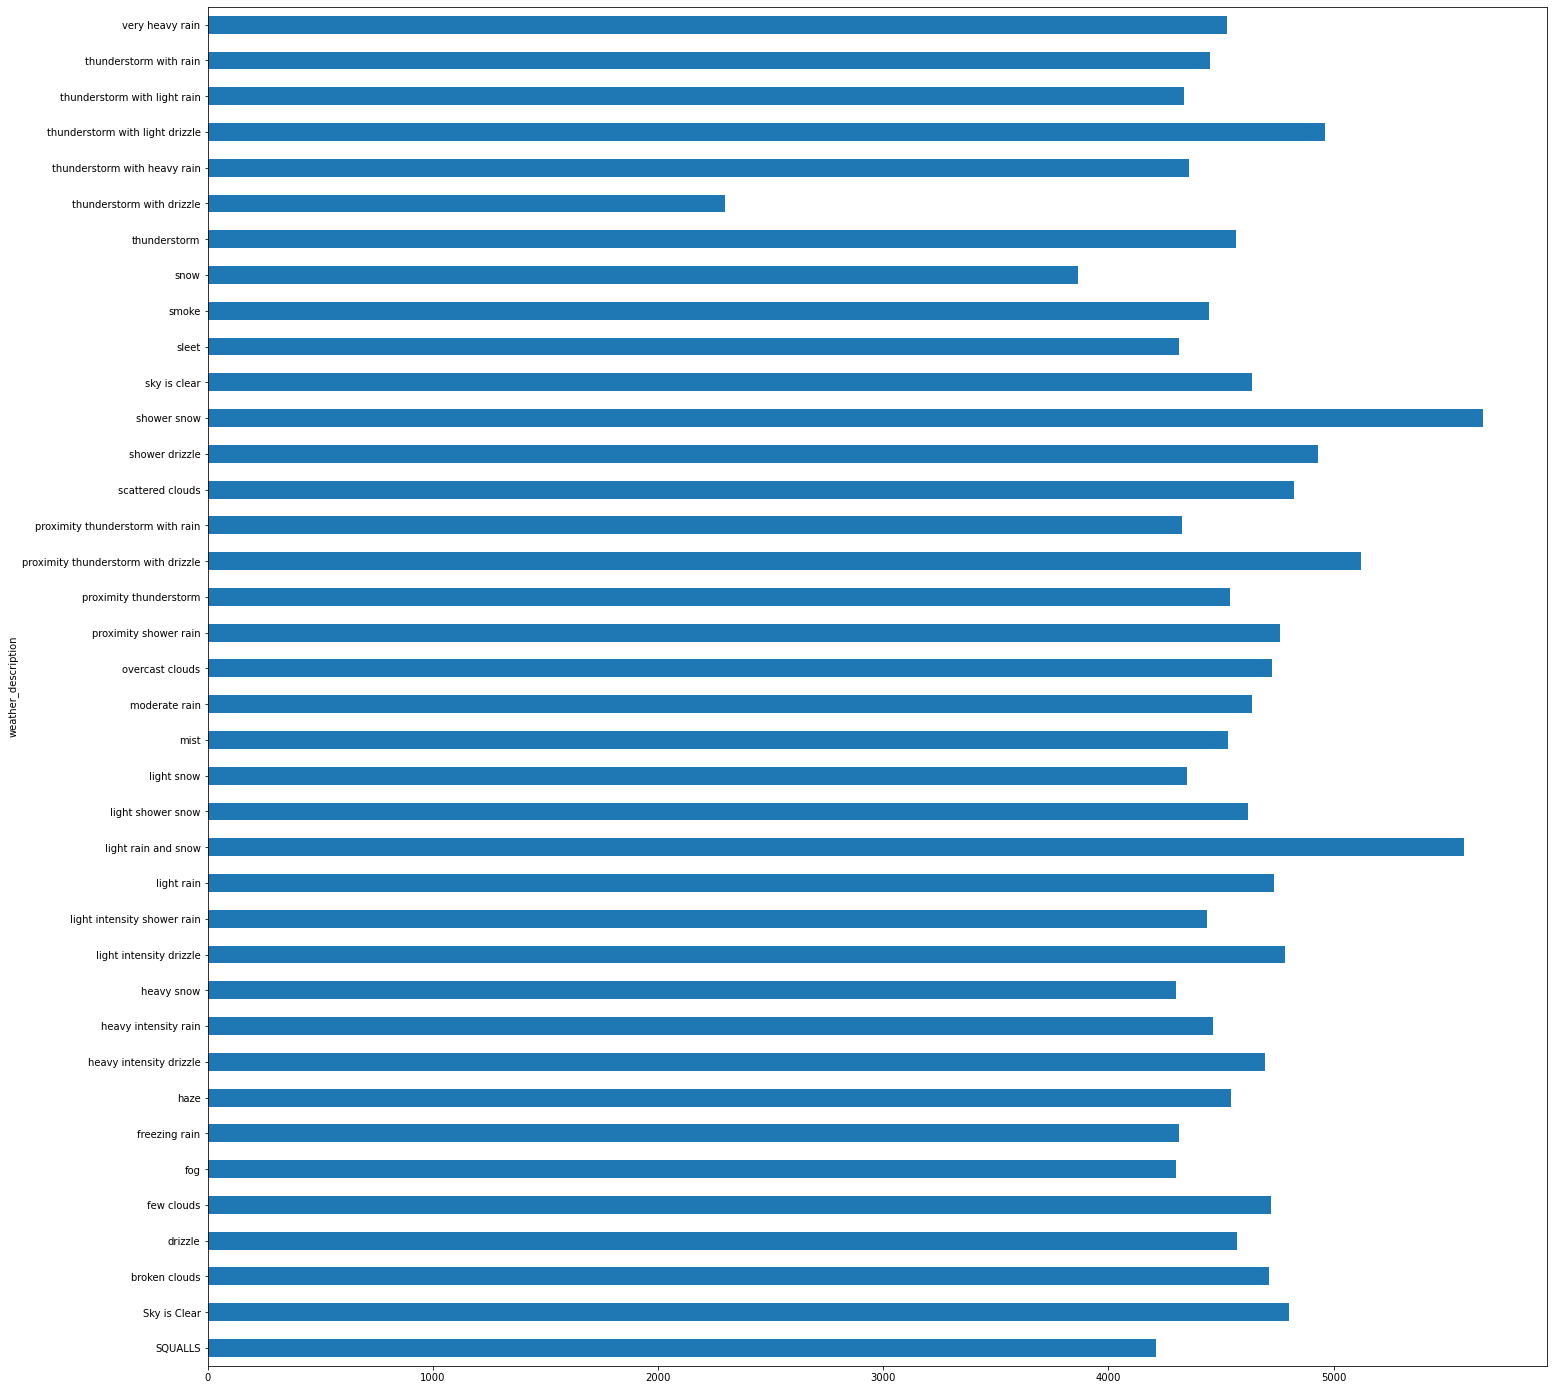

In [89]:
weather_description['traffic_volume'].plot.barh(figsize=(24,25))